In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

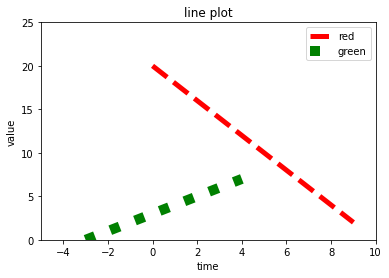

In [2]:
'''
line plot
'''
x1 = list(range(10))
y1 = list(range(20,0,-2))
x2 = list(range(-3,5))
y2 = list(range(8))
plt.plot(x1, y1, color='red', linewidth=5, linestyle='--', label='red')
plt.plot(x2, y2, color='green', lw=10, ls=':', label='green')
plt.xlabel('time')
plt.ylabel('value')
plt.xlim(-5,10)
plt.ylim(0,25)
plt.title('line plot')
plt.legend(loc='upper right')
plt.show()

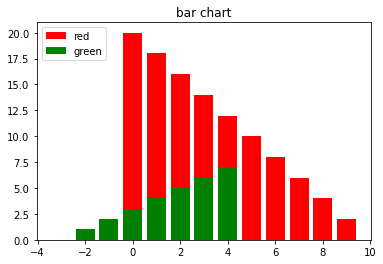

In [3]:
'''
bar chart
'''
plt.bar(x1, y1, color='red', label='red')
plt.bar(x2, y2, color='green', label='green')
plt.title('bar chart')
plt.legend(loc='upper left')

['large', 'large', 'large', 'medium', 'medium', 'medium', 'medium', 'medium', 'small', 'small']


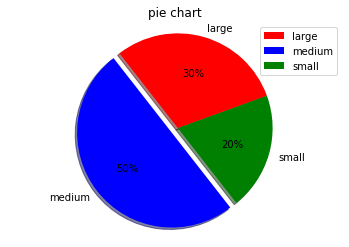

In [11]:
'''
pie chart
'''
lst = ['large']*3
lst += ['medium']*5
lst += ['small']*2
print(lst)
size_lst = ['large', 'medium', 'small']
cnt_lst = [lst.count('large'), lst.count('medium'), lst.count('small')]
color_lst = ['red', 'blue', 'green']
explode_ary = (0,0.08,0)
plt.pie(cnt_lst, explode = explode_ary, labels = size_lst, colors = color_lst,\
        labeldistance = 1.1, autopct = "%3.1f%%", shadow = True,\
        startangle = 20, pctdistance = 0.6)
plt.axis("equal")
plt.title('pie chart')
plt.legend()

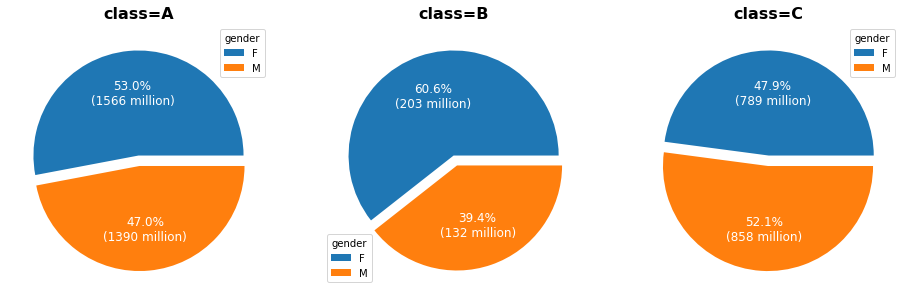

In [59]:
'''
customized pie chart with percentage and value in subplots
'''
#### text with percentage and value
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    idx = np.argmin([abs(absolute-i) for i in allvals])
    return "{:.1f}%\n({:d} million)".format(pct, int(allvals[idx]))

#### create dataset
data = pd.DataFrame({'class':np.random.choice(['A','B','C'], 100, p=[0.5, 0.1, 0.4]),
                     'asset_value':np.random.choice(100, 100),
                     'gender':np.random.choice(['F','M'], 100, p=[0.6, 0.4])})

#### pie with subplots
fig, ax = plt.subplots(1,len(data['class'].unique()), figsize=(16,32))
ax = ax.flatten()
tab = pd.crosstab(data['class'], data['gender'], data['asset_value'], aggfunc="sum")
for i, cat in enumerate(tab.index):
    val = [v for i, v in tab.loc[cat].items() if v >0]
    label = [i for i, v in tab.loc[cat].items() if v >0]
    separated = np.zeros(len(val))
    separated[-1] = 0.1
    ax[i].pie(val, labels=label, explode=separated, startangle=0, autopct=lambda pct: func(pct, val), textprops=dict(color="w", fontsize=12))
    ax[i].set_ylabel('')
    ax[i].set_title(f'class={cat}', fontweight='bold', fontsize=16)
    ax[i].legend(title='gender')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF7A61BAC8>,
      dtype=object)

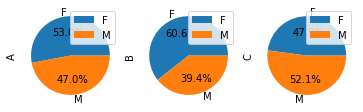

In [60]:
'''
easier way to plot pie chart in subplots
'''
grouped = data.groupby(['class', 'gender'])['asset_value'].sum().reset_index()
grouped.pivot('gender', 'class', 'asset_value').plot.pie(autopct="%.1f%%", subplots=True)